# EDA
1단계. 1차원데이터분석
    1) 변수종류파악(수치형/범주형/시간형)
    2) 변수종류별분석지표(수치형/범주형/시간형)
    3) 시각화 : 도수분포표 / 히스토그램 / 상자그림

2단계. 2차원데이터분석
    1) 상관계수
    2) 시각화 : 산점도 / 회귀직선 / 히트맵

In [3]:
import pandas as pd
df = pd.read_csv("./data/airline_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
airline : 항공사
pct_carrier_delay : 항공사 지연요인
pct_atc_delay : ATC 항공교통관제 지연요인
pct_weather_delay : 날씨 지연요인


In [6]:
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [7]:
df.tail()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest
33467,3.964393,1.700479,0.019449,Southwest


In [8]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [ ]:
# 항공사 현황 탐색

In [9]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [10]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [5]:
df.loc[:,'pct_carrier_delay']  #loc로 쓰려면 : 열 행 이런거 있어야 하니까!!

0         8.153226
1         5.959924
2         7.157270
3        12.100000
4         7.333333
           ...    
33463     6.186422
33464     9.522167
33465     9.164179
33466     5.152293
33467     3.964393
Name: pct_carrier_delay, Length: 33468, dtype: float64

총 6개 항공사의 데이터를 포함하고 있으며,
그 중 delta가 9107건으로 가장 많고, American, Southwest, United 순으로 5천건 수준이다.

In [ ]:
# 수치형 변수들의 통계량 확인

In [11]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [ ]:
#항공사별 통계량 확인
df.groupby('airline')['pct_carrier_delay'].describe().T

#여기서 .T는 뭐야?

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


In [15]:
df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


In [ ]:
# 결측치 확인, 처리

In [16]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [ ]:
#histogram으로 비교

In [19]:
import matplotlib.pyplot as plt

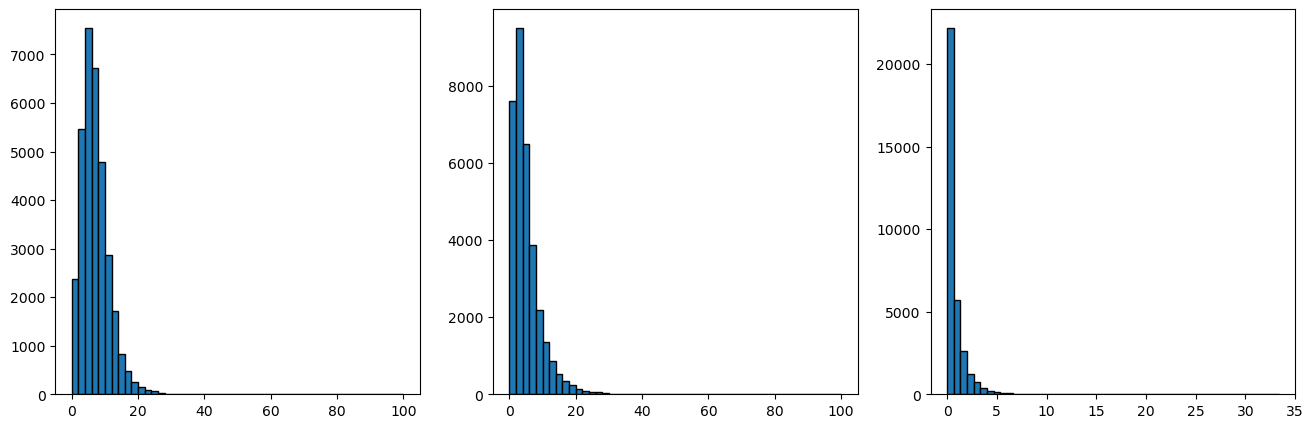

In [ ]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins=50, edgecolor='black')
ax2.hist(df['pct_atc_delay'], bins=50, edgecolor='black' )
ax3.hist(df['pct_weather_delay'], bins=50, edgecolor='black')
plt.show()

#소수의 값들이 있기 때문에 이렇게 보임 -> 박스플롯 / 잘라서 상위 몇개 / 이상치 확인하려면 박스플롯 보는게 나음

# 시각적 분석- 지연요인별로 분석

1. 항공사

In [27]:
import seaborn as sns

<Axes: >

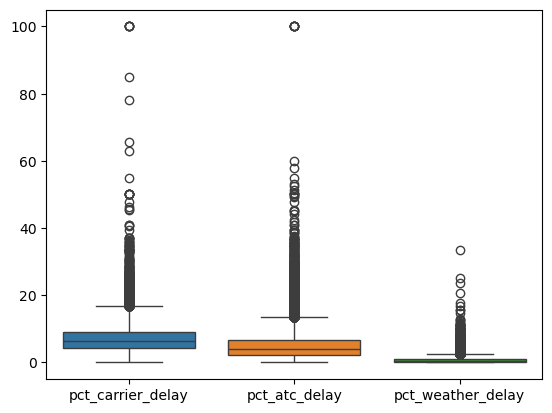

In [28]:
sns.boxplot(df)

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

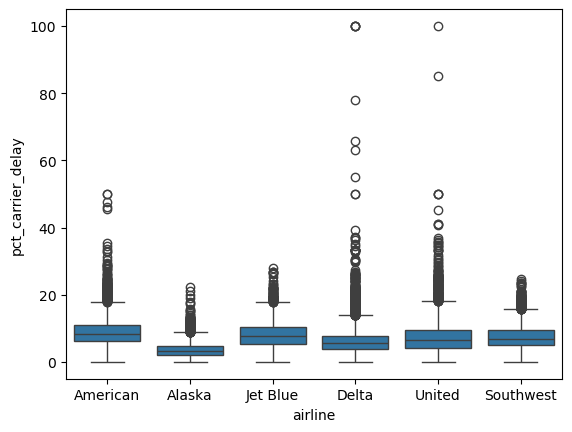

In [29]:
sns.boxplot(df, x='airline', y='pct_carrier_delay')

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

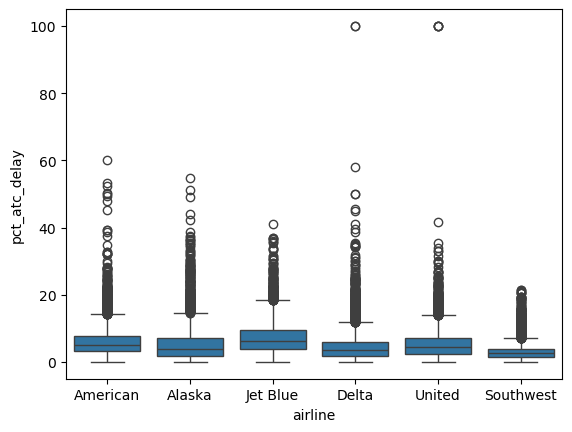

In [30]:
sns.boxplot(df, x='airline', y='pct_atc_delay')

<Axes: xlabel='airline', ylabel='pct_weather_delay'>

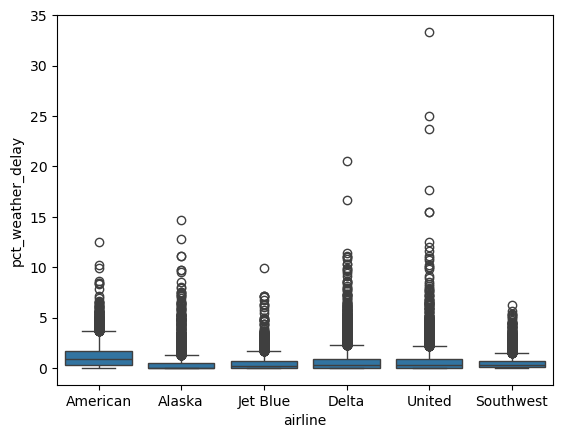

In [31]:
sns.boxplot(df, x='airline', y='pct_weather_delay')

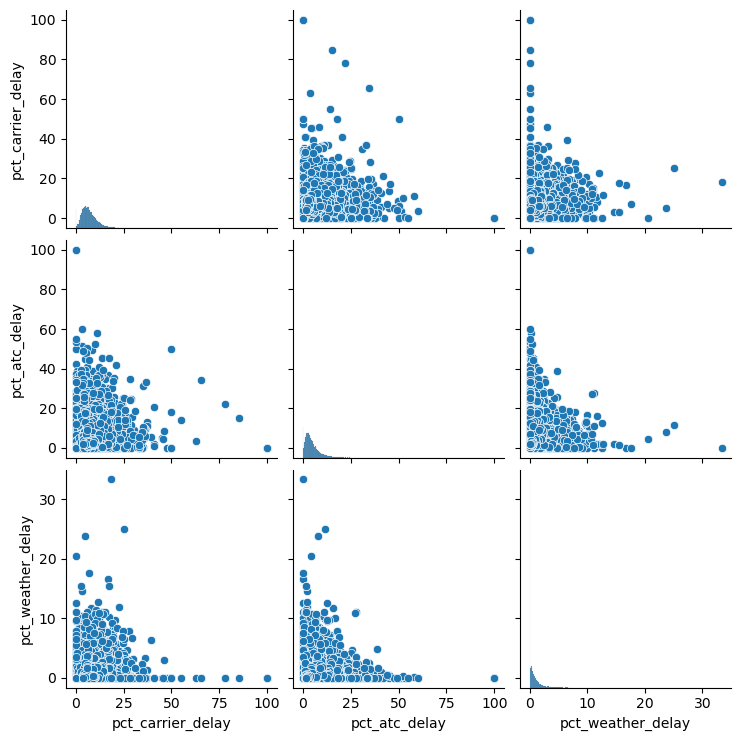

In [32]:
sns.pairplot(df)

<Axes: >

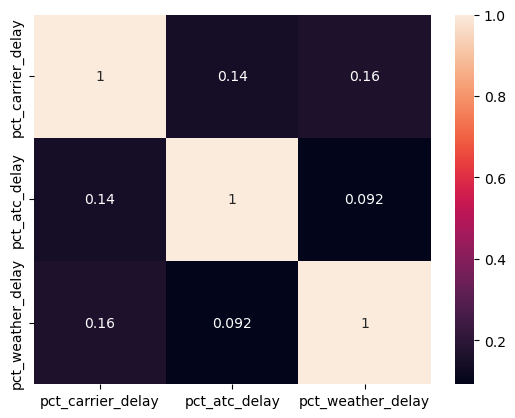

In [33]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

In [ ]:
2. 관제

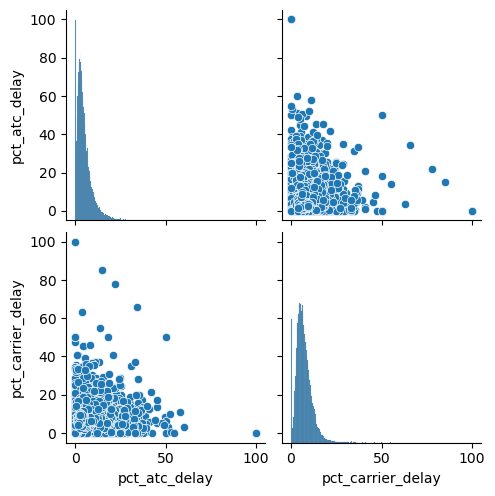

In [43]:
sns.pairplot(df[['pct_atc_delay', 'pct_carrier_delay']])

In [39]:
cols = ['pct_carrier_delay','pct_atc_delay', 'pct_weather_delay']

In [ ]:
sns.pairplot(df)

In [40]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
3. 날씨

In [ ]:
# 수치형 변수들의 통계량 확인

# 비교 분석

In [41]:
# 클린징 전후 데이터의 통계량 비교